In [1]:
import seaborn as sns
import matplotlib as mpl
import _init_
from constants import *
from set_path import *
from config import *
from functions import *
import scipy.integrate as integrate
import matplotlib.colors as mcolors
import matplotlib.cm

In [17]:
f_diss = 0.1
X = 0.74 
F0 = 2.1e7
G0 = 1. * 2. * f_diss * F0 * mp/X
r0 = 300. * pc
v0 = 170. * kmps
t0 = r0/v0
Sigma0        = 52.*Msun_pcsq
sat_rate = (G0/Sigma0 )
sat_time = 1./sat_rate/Myr
xi = np.log(G0*t0/Sigma0)
xi, sat_time, t0

(-3.118780721984645, 38.242852004077065, 53258823529411.766)

# Fixed Area

In [31]:
Mach  = np.logspace(0.1, 4., 100)
Gamma = np.logspace(-2, 2., 100)
rmax = 10. * kpc

a = rmax/r0

dMassFluxHI = np.zeros((Mach.shape[0], Gamma.shape[0]))
dMassFluxtot = np.zeros((Mach.shape[0], Gamma.shape[0]))

i = j =0 

for M in Mach:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xlow = -10
        xhigh = xcrit
        
        dMassFluxHI[i,j] = integrate.quad(dMassFlux_HI,xlow, xhigh,   \
                                            args=(a, gamma, r0/v0, G0, Sigma0, M, 0))[0]
        
        dMassFluxtot[i,j] = integrate.quad(dMassFlux_tot, xlow, xhigh,  \
                                            args=(a, gamma, r0/v0, G0, Sigma0, M, 0))[0] 
        
        
        j+=1
            
    i+=1



/var/folders/bh/gk6r7v913g3dxj455c079xyh0000gq/T/ipykernel_57292/3847087500.py:25: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  dMassFluxHI[i,j] = integrate.quad(dMassFlux_HI,xlow, xhigh,   \


In [42]:
dMassFlux = dMassFluxHI/dMassFluxtot
FH2 = 1. - dMassFlux

np.amax(FH2),np.amin(FH2)

(0.9943947147753627, 0.0)

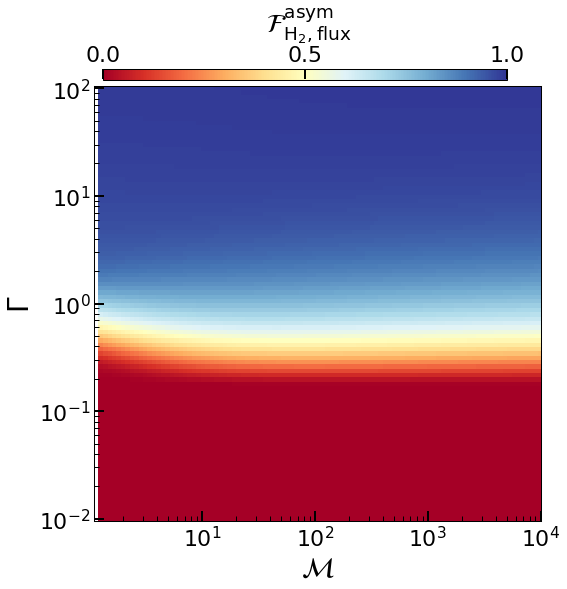

In [44]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(8,8))

cbarx    = 0.141
cbheight = 0.02
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1
colors =  sns.color_palette("RdYlBu", 8, as_cmap=True)

plot = ax.pcolormesh(Mach, Gamma, np.transpose(FH2),\
                    vmin=0., vmax=1.,
                    cmap=colors)
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0.0, 0.5 ,1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm H_2, flux}^{\rm asym}$")
ax.set_xlim(1.1, 1.e4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel(r'$\Gamma$', fontsize=28)
ax.set_xlabel(r'$\mathcal{M}$', fontsize=28)
# ax.text(0.4, 0.1,r'$\mathbb{S}^{-1}=%.f$'%(sat_time) + r' Myr', transform=ax.transAxes, color='white', fontsize=26)
file_name = os.path.join(fig_path, 'gamma_Mach.jpeg')
plt.savefig(file_name, bbox_inches='tight', dpi=160 )


# Fixed Solid Angle

In [6]:
Mach  = np.logspace(0.1, 4., 20)
Gamma = np.linspace(0.1, 0.5, 20)
rmax = 10. * kpc

a = rmax/r0

dMassFluxHI = np.zeros((Mach.shape[0], Gamma.shape[0]))
dMassFluxtot = np.zeros((Mach.shape[0], Gamma.shape[0]))

i = j =0 

for M in Mach:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xhigh = 1.*xcrit
        xlow  = 1.5*xcrit
        dMassFluxHI[i,j] = integrate.dblquad(dMassFlux_HI,1, a, xlow, xhigh,   \
                                            args=(gamma, r0/v0, G0, Sigma0, M, 2))[0]
        
        dMassFluxtot[i,j] = integrate.dblquad(dMassFlux_tot, 1, a, xlow, xhigh,  \
                                            args=(gamma, r0/v0, G0, Sigma0, M, 2))[0] 
        
        if(dMassFluxtot[i,j]<0.0):
            print("neg")
        
        j+=1
            
    i+=1



In [7]:
dMassFlux = dMassFluxHI/dMassFluxtot
FH2 = 1. - dMassFlux


np.amax(FH2),np.amin(FH2)

(0.9707302869303416, 0.8453400147516942)

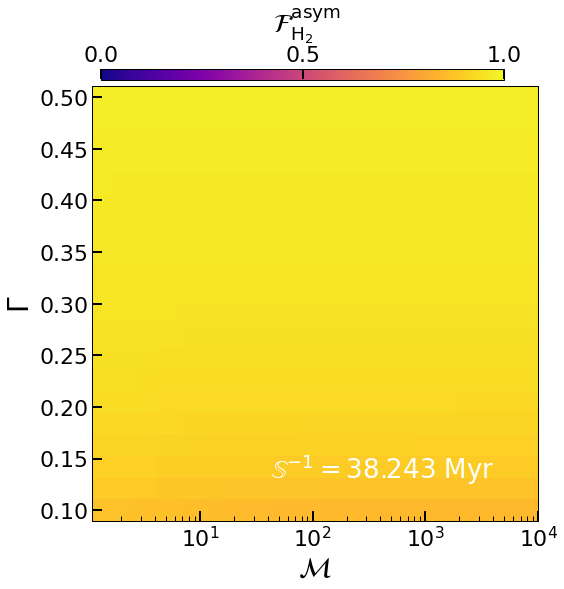

In [8]:

fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(8,8))

cbarx    = 0.141
cbheight = 0.02
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1


plot = ax.pcolormesh(Mach, Gamma, np.transpose(FH2),\
                    vmin=0.0, vmax=1.,
                    cmap='plasma')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0., 0.5, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm {H}_2}^{\rm asym}$")
ax.set_xlim(1.1, 1.e4)
ax.set_xscale('log')
ax.set_ylabel(r'$\Gamma$', fontsize=28)
ax.set_xlabel(r'$\mathcal{M}$', fontsize=28)
ax.text(0.4, 0.1,r'$\mathbb{S}^{-1}=%.3f$'%(sat_time) + r' Myr', transform=ax.transAxes, color='white', fontsize=26)
file_name = os.path.join(fig_path, 'gamma_Mach_sinv_38M_fSA.jpeg')
# plt.savefig(file_name, bbox_inches='tight', dpi=160 )

# Intermediate Area Case

In [12]:
Mach  = np.logspace(0.1, 4., 20)
Gamma = np.linspace(0.1, 0.5, 20)
rmax = 10. * kpc

a = rmax/r0

dMassFluxHI = np.zeros((Mach.shape[0], Gamma.shape[0]))
dMassFluxtot = np.zeros((Mach.shape[0], Gamma.shape[0]))

i = j =0 

for M in Mach:
    j=0
    for gamma in Gamma:
        xcrit = np.log(gamma)
        xhigh = 1.*xcrit
        xlow  = 1.5*xcrit
        dMassFluxHI[i,j] = integrate.dblquad(dMassFlux_HI,1, a, xlow, xhigh,   \
                                            args=(gamma, r0/v0, G0, Sigma0, M, 1))[0]
        
        dMassFluxtot[i,j] = integrate.dblquad(dMassFlux_tot, 1, a, xlow, xhigh,  \
                                            args=(gamma, r0/v0, G0, Sigma0, M, 1))[0] 
        
    
        j+=1
            
    i+=1



In [13]:
dMassFlux = dMassFluxHI/dMassFluxtot
FH2 = 1. - dMassFlux

np.amax(FH2),np.amin(FH2)

(0.9877337795356774, 0.9490898474509638)

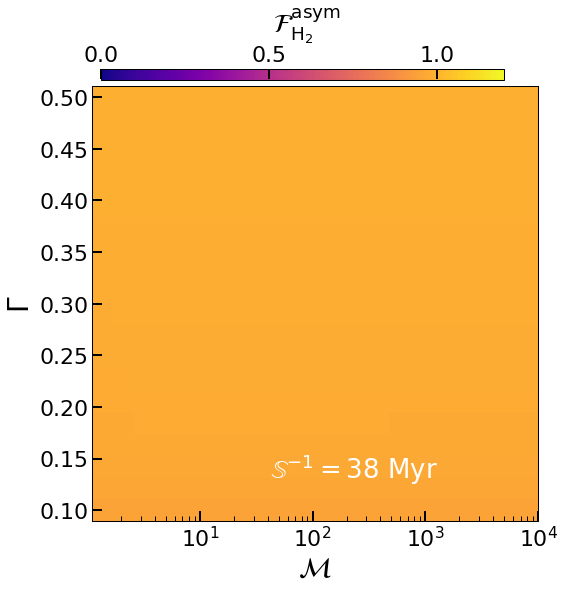

In [14]:

fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(8,8))

cbarx    = 0.141
cbheight = 0.02
cbary = 0.89
cblen = 0.7
dx1 = 0.4
cbtitlex = 0.1


plot = ax.pcolormesh(Mach, Gamma, np.transpose(FH2),\
                    vmin=0.0, vmax=1.2,
                    cmap='plasma')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(0., 0.5, 1.))
cax.xaxis.set_ticks_position('top')
cax.set_title(r" $\mathcal{F}_{\rm {H}_2}^{\rm asym}$")
ax.set_xlim(1.1, 1.e4)
ax.set_xscale('log')
ax.set_ylabel(r'$\Gamma$', fontsize=28)
ax.set_xlabel(r'$\mathcal{M}$', fontsize=28)
ax.text(0.4, 0.1,r'$\mathbb{S}^{-1}=%.f$'%(sat_time) + r' Myr', transform=ax.transAxes, color='white', fontsize=26)
file_name = os.path.join(fig_path, 'gamma_Mach_sinv_38M_fSA.jpeg')
# plt.savefig(file_name, bbox_inches='tight', dpi=160 )